In [1]:
cd '/Users/aidasaglinskas/Downloads/stuff/star-clustering-master/'

/Users/aidasaglinskas/Downloads/stuff/star-clustering-master


In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from star_clustering import StarCluster
import hdbscan
star = StarCluster()

In [3]:
in_dir='/Users/aidasaglinskas/Desktop/roi_paper_data/'
code_root = '/Users/aidasaglinskas/Desktop/BC-ASD-FC/'
#in_dir = '/gsfs0/data/aglinsai/roi_paper_data'
#code_root = '/gsfs0/data/aglinsai/BC-ASD-FC'

csv_fn = os.path.join(code_root,'Excel','DS-use.csv')
rdf_fn = os.path.join(code_root,'Data','RoiNames.xlsx')

temp = os.listdir(in_dir)

cmat_files = [file for file in temp if 'cmat' in file]
proportion_files = [file for file in temp if 'proportion' in file]
subs_files = [file for file in temp if 'subs' in file]
cmat_files.sort()
proportion_files.sort()
subs_files.sort()

#[print(file) for file in cmat_files]
[print('|'.join([str(i),cmat_files[i]])) for i in range(len(cmat_files))];
print('______\n')
#[print(file) for file in proportion_files]
[print('|'.join([str(i),proportion_files[i]])) for i in range(len(proportion_files))];
print('______\n')
#[print(file) for file in subs_files]
[print('|'.join([str(i),subs_files[i]])) for i in range(len(subs_files))];

0|mv2Mask_3001_cmats_126_task-face.npz
1|pmask2_3001_cmats_121_task-rest.npz
2|pmask_3001_cmats_127_task-face.npz
3|pmask_3001_cmats_127_task-rest.npz
4|rMask_3001_cmats_105_task-rest.npz
5|rfx2Mask_3001_cmats_12_task-face.npz
6|rfx2Mask_501_cmats_16_task-face.npz
7|rfx2Mask_501_cmats_16_task-rest.npz
8|rfx2Mask_501_cmats_20_task-face.npz
9|rfx2Mask_501_cmats_22_task-face.npz
______

0|mv2Mask_3001_proportionMat_126_task-face.npz
1|pmask2_3001_proportionMat_121_task-rest.npz
2|pmask_3001_proportionMat_127_task-face.npz
3|pmask_3001_proportionMat_127_task-rest.npz
4|rMask_3001_proportionMat_105_task-rest.npz
5|rfx2Mask_3001_proportionMat_12_task-face.npz
6|rfx2Mask_501_proportionMat_16_task-face.npz
7|rfx2Mask_501_proportionMat_16_task-rest.npz
8|rfx2Mask_501_proportionMat_20_task-face.npz
9|rfx2Mask_501_proportionMat_22_task-face.npz
______

0|mv2Mask_3001_subs_126_task-face.npz
1|pmask2_3001_subs_121_task-rest.npz
2|pmask_3001_subs_127_task-face.npz
3|pmask_3001_subs_127_task-rest.npz

In [4]:
i = 3

cmat_fn = os.path.join(in_dir,cmat_files[i])
proportionMat_fn = os.path.join(in_dir,proportion_files[i])
subs_fn = os.path.join(in_dir,subs_files[i])
cmats = np.load(cmat_fn)
proportionMat = np.load(proportionMat_fn)
subs = np.load(subs_fn)

subs=subs['arr_0']
proportionMat = proportionMat['arr_0']
cmats = cmats['arr_0']

print(cmat_fn)
print(cmats.shape)
print(proportionMat_fn)
print(proportionMat.shape)
print(subs_fn)
print(subs.shape)

def get_df(subs):
    csv_fn='/Users/aidasaglinskas/Desktop/BC-ASD-FC/Excel/DS-use.csv'
    df = pd.read_csv(csv_fn)
    slice_vec = [np.array(df['BIDS ID'])[sub] in subs for sub in range(len(df))]
    df=df = df[slice_vec]
    df = df.reset_index()
    print(all([df['BIDS ID'][sub]==subs[sub] for sub in range(len(subs))]))
    
    return df

df = get_df(subs)
print(len(df))

df.columns
df.groupby('family_type').count()
dfo=df

vec = [s in ['16p-duplication','16p-deletion','non-familial-control'] for s in np.array(dfo['family_type']) ]
#bad_subs = ['sub-008','sub-012','sub-040','sub-044','sub-057','sub-076','sub-101','sub-117','sub-133','sub-138','sub-144','sub-153','sub-156','sub-160','sub-185','sub-191','sub-238','sub-239','sub-265','sub-291','sub-293','sub-314','sub-315','sub-317','sub-326']
bad_subs = ['sub-008','sub-040','sub-057','sub-117','sub-138','sub-156','sub-185','sub-265','sub-291','sub-293','sub-314']
vec = [df['BIDS ID'][s] not in bad_subs and vec[s] for s in range(len(vec))]

def slice_data(vec):
    '''proportionMat2,cmats2,df2'''
    proportionMat2=proportionMat[vec,:,:]
    cmats2=cmats[vec,:,:]
    subs2=subs[vec]
    df2 = get_df(subs2)
    return proportionMat2,cmats2,subs2,df2

proportionMat,cmats,subs,df = slice_data(vec)


print(len(df))

/Users/aidasaglinskas/Desktop/roi_paper_data/pmask_3001_cmats_127_task-rest.npz
(127, 51, 51, 51)
/Users/aidasaglinskas/Desktop/roi_paper_data/pmask_3001_proportionMat_127_task-rest.npz
(127, 51, 51)
/Users/aidasaglinskas/Desktop/roi_paper_data/pmask_3001_subs_127_task-rest.npz
(127,)
True
127
True
106


In [5]:
nsubs=cmats.shape[0]
nmasks=cmats.shape[1]
conn=np.zeros((nsubs,nmasks,1275))

for s in range(nsubs):
    for m in range(nmasks):
        conn[s,m,:]=cmats[s,m,:,:][np.triu_indices(51,1)]

In [6]:
print(np.array(df['BIDS ID']))

['sub-004' 'sub-012' 'sub-014' 'sub-018' 'sub-025' 'sub-029' 'sub-030'
 'sub-039' 'sub-042' 'sub-043' 'sub-044' 'sub-058' 'sub-064' 'sub-066'
 'sub-074' 'sub-076' 'sub-090' 'sub-091' 'sub-097' 'sub-098' 'sub-101'
 'sub-120' 'sub-122' 'sub-125' 'sub-133' 'sub-142' 'sub-143' 'sub-144'
 'sub-145' 'sub-148' 'sub-153' 'sub-154' 'sub-155' 'sub-158' 'sub-159'
 'sub-160' 'sub-162' 'sub-163' 'sub-166' 'sub-167' 'sub-171' 'sub-175'
 'sub-177' 'sub-178' 'sub-181' 'sub-190' 'sub-191' 'sub-201' 'sub-203'
 'sub-204' 'sub-205' 'sub-207' 'sub-212' 'sub-226' 'sub-227' 'sub-228'
 'sub-229' 'sub-230' 'sub-237' 'sub-238' 'sub-239' 'sub-240' 'sub-242'
 'sub-244' 'sub-245' 'sub-252' 'sub-253' 'sub-257' 'sub-258' 'sub-259'
 'sub-262' 'sub-264' 'sub-270' 'sub-272' 'sub-273' 'sub-274' 'sub-275'
 'sub-276' 'sub-279' 'sub-280' 'sub-284' 'sub-285' 'sub-286' 'sub-287'
 'sub-290' 'sub-294' 'sub-295' 'sub-296' 'sub-300' 'sub-309' 'sub-313'
 'sub-315' 'sub-316' 'sub-317' 'sub-318' 'sub-320' 'sub-323' 'sub-324'
 'sub-

In [7]:
df.groupby('family_type').count()

,index,BIDS ID,SVIP ID,FCAP1,SCAP1,SCAP2,ados_css,ados_module,age_months,best_full_scale_iq,...,rrb_css,sa_css,sex,svip_diagnosis_m1,svip_neuro_exam.background.head_circum,svip_neuro_exam.background.head_circum_perc,svip_neuro_exam.background.head_circum_z_score,svip_neuro_exam.measure.eval_age_months,svip_neuro_exam.measure.measure_type,age_years
family_type,,,,,,,,,,,,,,,,,,,,,
16p-deletion,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
16p-duplication,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
non-familial-control,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65


In [27]:
import numpy as np
from scipy.special import digamma, gammaln
from sklearn.cluster import KMeans
xrange = range

def logsumexp(arr, axis=0):  
    """Computes the sum of arr assuming arr is in the log domain.
    Returns log(sum(exp(arr))) while minimizing the possibility of
    over/underflow."""
    arr = np.rollaxis(arr, axis)
    # Use the max to normalize, as with the log this is what accumulates
    # the less errors
    vmax = arr.max(axis=0)
    out = np.log(np.sum(np.exp(arr - vmax), axis=0))
    out += vmax
    return out

def log_normalize(v, axis=0):
    """Normalized probabilities from unnormalized log-probabilites"""
    v = np.rollaxis(v, axis)
    v = v.copy()
    v -= v.max(axis=0)
    out = logsumexp(v)
    v = np.exp(v - out)
    v += np.finfo(np.float32).eps
    v /= np.sum(v, axis=0)
    return np.swapaxes(v, 0, axis)

'''
alpha ~ Gamma(1, 1)
V ~ Beta(1, alpha)
C ~ SBP(V)
Mu ~ Normal(0, I)
(tau)~ Gamma(1, 1)
X ~ N(Mu, tau^-1I_p)

q(vt) ~ Beta(vt | gamma_t,1, gamma_t,2)
q(cn) ~ Discrete(zn | phi_n)
q(mu_t) ~ Normal(mean_mu, nglambda)
q(tau_t) ~ Gamma(a_tao, b_tao)
'''
class VDPGMM(object):
    def __init__(self, T, max_iter = 50, alpha = 1, thresh=1e-3, verbose=False):
        self.T = T
        self.max_iter = max_iter
        self.alpha = alpha
        self.thresh = thresh
        self.verbose = verbose

    _log_normalize = staticmethod(log_normalize)

    def _initialize(self, X):
        self.X = X
        self.N, self.P = X.shape

        # mu
        # self.mean_mu = np.zeros((self.T, self.P))
        self.mean_mu = KMeans(n_clusters=self.T).fit(X).cluster_centers_[::-1]
        self.cov_mu = np.empty((self.T, self.P, self.P))
        for i in xrange(self.T):
            self.cov_mu[i] = np.eye(self.P)

        # tao
        self.a_tao = np.ones(self.T)
        self.b_tao = np.ones(self.T) 

        # v
        self.gamma = self.alpha * np.ones((self.T, 2))

        # c
        self.phi = np.ones((self.T, self.N)) / self.T
        self.Nt = np.sum(self.phi, axis = 1)

        #hyper
        self.a0 = 1
        self.b0 = 1

        self.lbs = []
        self.converge = False

        self.bound_X = self._bound_x(self.X)

    def _bound_x(self, X):
        N, P = X.shape
        bound_x = np.empty((self.T, N))
        for t in xrange(self.T):
            bound_x[t] = np.sum((X - self.mean_mu[t])**2, axis = 1) + np.trace(self.cov_mu[t])
        return bound_x

    def _update(self, X):
        #E STEP
        self.phi, self.Nt = self._update_c(self.bound_X)

        #M STEP
        self.update_v()
        self.update_mu()

        self.bound_X = self._bound_x(self.X)
        self.update_tao(self.bound_X)

    def print_log(self, n=0):
        clusters = np.argmax(self.phi, axis=0)
        #print 'n=%d, clusters=%d %s'%(n + 1, len(np.unique(clusters)), np.unique(clusters))
        
        #print [np.sum(clusters == label) for label in np.unique(clusters)] 

        #print 'lowerbound ', self.lbs[-1]
        
        if len(self.lbs) > 1:
            eps = self.lbs[-1] - self.lbs[-2]
            #print 'eps:%f, diff:%.5f%%'%(eps, 100 * (self.lbs[-1] - self.lbs[-2]) / np.abs(self.lbs[-2]))

    def _do_fit(self, update_func):
        self.lbs = []
        n_iter = self.max_iter
        self.converge = False
        for i in xrange(n_iter):
            update_func()

            self.lbs.append(self.lowerbound())

            if self.verbose:
                self.print_log(i)

            if self.thresh is not None and len(self.lbs) > 1 and \
                100 * (self.lbs[-1] - self.lbs[-2]) / np.abs(self.lbs[-2]) < self.thresh:
                self.converge = True
                break

    def fit(self, X):
        self._initialize(X)

        update_func = lambda: self._update(self.X)

        self._do_fit(update_func)

    def update_mu(self):
        for t in xrange(self.T):
            tao_t = self.a_tao[t] / self.b_tao[t]
            Nt = np.sum(self.phi[t])
            self.cov_mu[t] = np.linalg.inv((tao_t*Nt + 1)*np.eye(self.P))
            self.mean_mu[t] = tao_t * self.cov_mu[t].dot(self.X.T.dot(self.phi[t]))

    def update_tao(self, bound_X):
        for t in xrange(self.T):
            self.a_tao[t] = self.a0 + .5 * self.P * np.sum(self.phi[t])
            self.b_tao[t] = self.b0 + .5 * np.sum(np.multiply(self.phi[t], bound_X[t]))

    def update_v(self):
        sum_phi = self.Nt
        self.gamma[:, 0] = 1 + sum_phi
        phi_cum = np.cumsum(self.phi[:0:-1, :], axis = 0)[::-1, :]
        self.gamma[:-1, 1] = self.alpha + np.sum(phi_cum, axis = 1)

    def _log_lik_pi(self):
        sd = digamma(self.gamma[:, 0] + self.gamma[:, 1])
        logv = digamma(self.gamma[:, 0]) - sd
        sum_lognv = np.zeros(self.T)
        for t in xrange(1, self.T):
            sum_lognv[t] = sum_lognv[t-1] + digamma(self.gamma[t-1, 1]) - sd[t-1]

        likc = logv + sum_lognv
        likc[-1] = np.log(1 - (sum(np.exp(likc[:-1]))))

        return likc

    def _log_lik_x(self, bound_X):
        likx = np.zeros(bound_X.shape)
        for t in xrange(self.T):
            likx[t, :] = .5*self.P*(digamma(self.a_tao[t]) - np.log(self.b_tao[t]) - np.log(2*np.pi))
            tao_t = self.a_tao[t] / self.b_tao[t]
            likx[t, :] -= .5 * tao_t * bound_X[t]
        return likx

    def _update_c(self, bound_X):
        likc = self._log_lik_pi()

        likx = self._log_lik_x(bound_X)

        s = likc[:, np.newaxis] + likx

        phi = self._log_normalize(s, axis=0)

        return phi, np.sum(self.phi, axis = 1)

    def lowerbound(self):
        lb = 0
        T = self.T
        gamma = self.gamma
        sd = digamma(gamma[:, 0] + gamma[:, 1])
        dg0 = digamma(gamma[:, 0]) - sd
        dg1 = digamma(gamma[:, 1]) - sd
        #V
        alpha = self.alpha
        # Eq[log p(V | 1, alpha)]
        lpv = (gammaln(1 + alpha) - gammaln(alpha)) * T \
            + (alpha - 1) * np.sum(dg1)
        # Eq[log q(V | gamma1, gamma2)]
        lqv = np.sum(gammaln(gamma[:, 0] + gamma[:, 1]) \
            - gammaln(gamma[:, 0]) - gammaln(gamma[:, 1]) \
            + (gamma[:, 0] - 1) * dg0 + (gamma[:, 1] - 1) * dg1)
        lb += lpv - lqv

        #mu
        lpmu = 0
        lqmu = 0
        for t in xrange(T):
            # Eq[log p(mu)]
            lpmu += -.5 * (self.mean_mu[t].dot(self.mean_mu[t]) + np.trace(self.cov_mu[t]))
            sign, logdet = np.linalg.slogdet(self.cov_mu[t])
            # Eq[log q(mu | mean_mu, cov_mu)]
            lqmu += -.5 * sign * logdet
        lb += lpmu - lqmu

        #tao
        # Eq[log p(tau)]
        lptao = - np.sum(self.a_tao / self.b_tao)
        # Eq[log q(tau | a_tao, b_tao]
        lqtao = np.sum(-gammaln(self.a_tao) + (self.a_tao-1)*digamma(self.a_tao) \
            + np.log(self.b_tao) - self.a_tao)
        lb += lptao - lqtao

        #c
        phi_cum = np.cumsum(self.phi[:0:-1, :], axis = 0)[::-1, :]
        lpc = 0
        # Eq[log p(Z | V)]
        for t in xrange(T):
            if t < T - 1:
                lpc += np.sum(phi_cum[t] * dg1[t])
            lpc += np.sum(self.phi[t]*dg0[t])
        n_phi = self.phi #[self.phi>np.finfo(np.float32).eps]
        # Eq[log q(Z | phi)]
        lqc = np.sum(n_phi*np.log(n_phi))
        lb += lpc - lqc

        #x
        lpx = 0
        # Eq[log p(X)]
        likx = self._log_lik_x(self.bound_X)
        lpx = np.sum(self.phi * likx)

        lb += lpx
        return lb

    def predict(self, X):
        bound_X = self._bound_x(X)
        phi, _ = self._update_c(bound_X)
        clusters = np.argmax(phi, axis=0)
        return clusters

In [32]:
data = proportionMat[:,0,:]

array([49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49])

In [216]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt;

def test_clusters(data,alpha=1):
    print('ndim={}'.format(data.shape[1]))
    embedding = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=1, dissimilarity='euclidean')
    X_transformed = embedding.fit_transform(data,)

    plt.figure(figsize=np.array((7,5))*1.5)

    plt.subplot(2,2,1);
    plt.scatter(X_transformed[:,0],X_transformed[:,1]);
    plt.title('Ground truth',fontsize=15);

    plt.subplot(2,2,2);
    VIGMM = VDPGMM(data.shape[0],alpha=alpha)
    VIGMM.fit(data)
    #star.fit(data);
    plt.scatter(X_transformed[:,0],X_transformed[:,1],c=VIGMM.predict(data));
    plt.title('VIGMM clustering: {}'.format(len(np.unique(VIGMM.predict(data)))),fontsize=15);

    model = mixture.BayesianGaussianMixture(max_iter=100000,
                                      n_components=20,covariance_type=['full','tied','diag' ,'spherical'][3],
                                      init_params='kmeans',tol=1e-5,
                                      weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=alpha,mean_precision_prior=None)
    
    
    plt.subplot(2,2,3);
    model.fit(data);
    bnpz = model.predict(data);
    plt.scatter(X_transformed[:,0],X_transformed[:,1],c=bnpz);
    plt.title('BNP clustering: {}'.format(len(np.unique(bnpz))),fontsize=15);

    plt.subplot(2,2,4);
    clusterrer = hdbscan.HDBSCAN();
    clusterrer.fit(data);
    plt.scatter(X_transformed[:,0],X_transformed[:,1],c=clusterrer.labels_);
    plt.title('HDBSCAN clustering: {}'.format(len(np.unique(clusterrer.labels_))),fontsize=15);

In [36]:
def get_tiny_C(C1):
    # Input cmats[:,0,:,:]
    nsubs=C0.shape[0]
    nnets = len(unets)
    C1_tiny=np.zeros((nsubs,nnets,nnets))
    for s in np.arange(nsubs):
        for i in np.arange(nnets):
            for j in np.arange(nnets):
                ridx=np.array(nets==unets[i])
                cidx=np.array(nets==unets[j])
                if i==j:
                    C1_tiny[s,i,j]=C1[:,ridx,:][:,:,cidx][s][np.triu_indices(sum(cidx),1)].mean()
                else:
                    C1_tiny[s,i,j]=C1[:,ridx,:][:,:,cidx][s].mean()
                    
    return C1_tiny

In [37]:
rnames = ['LH-Vis-EVC' ,'LH-SomMot-M1' ,'LH-DorsAttn-Post' ,'LH-DorsAttn-FEF' ,'LH-DorsAttn-PrCv' ,'LH-SalVentAttn-ParOper' ,'LH-SalVentAttn-TempOcc' ,'LH-SalVentAttn-FrOper' ,'LH-SalVentAttn-PFCl' ,'LH-SalVentAttn-Med' ,'LH-Limbic-OFC' ,'LH-Limbic-TempPole' ,'LH-Cont-Par' ,'LH-Cont-Temp' ,'LH-Cont-PFCd' ,'LH-Cont-PFCl' ,'LH-Cont-OFC' ,'LH-Cont-PFCv' ,'LH-Cont-pCun' ,'LH-Cont-Cing' ,'LH-Cont-PFCmp' ,'LH-Default-Par' ,'LH-Default-Temp' ,'LH-Default-PFC' ,'LH-Default-PCC' ,'LH-Default-PHC' ,'RH-Vis-EVC' ,'RH-SomMot-M1' ,'RH-DorsAttn-Post' ,'RH-DorsAttn-FEF' ,'RH-DorsAttn-PrCv' ,'RH-SalVentAttn-TempOccPar' ,'RH-SalVentAttn-PrC' ,'RH-SalVentAttn-FrOper' ,'RH-SalVentAttn-PFCv' ,'RH-SalVentAttn-PFCl' ,'RH-SalVentAttn-Med' ,'RH-Limbic-OFC' ,'RH-Limbic-TempPole' ,'RH-Cont-Par' ,'RH-Cont-Temp' ,'RH-Cont-PFCv' ,'RH-Cont-PFCl' ,'RH-Cont-pCun' ,'RH-Cont-Cing' ,'RH-Cont-PFCmp' ,'RH-Default-Par' ,'RH-Default-Temp' ,'RH-Default-PFCv' ,'RH-Default-PFCm' ,'RH-Default-PCC']
nets=[lbl.split('-')[1] for lbl in rnames];nets=np.array(nets)
unets = np.unique(nets)

In [38]:
P = proportionMat[:,50,:]
C0=cmats[:,0,:,:]
C1=cmats[:,50,:,:]

C0_tiny = get_tiny_C(cmats[:,0,:,:])
C50_tiny = get_tiny_C(cmats[:,50,:,:])

def flatten_C(input_C):
    nsubs = input_C.shape[0]
    ndim = input_C.shape[2]
    output_C = input_C[0,:,:][np.triu_indices(ndim,1)]
    for s in range(1,nsubs):
            output_C = np.vstack((output_C,input_C[s,:,:][np.triu_indices(ndim,1)]))
    return output_C

# Make P tiny
print(P.shape)
P_tiny = np.array([np.array(P[:,nets==net]).mean(axis=1) for net in unets]).transpose()
print(P_tiny.shape)

(106, 51)
(106, 7)


ndim=51


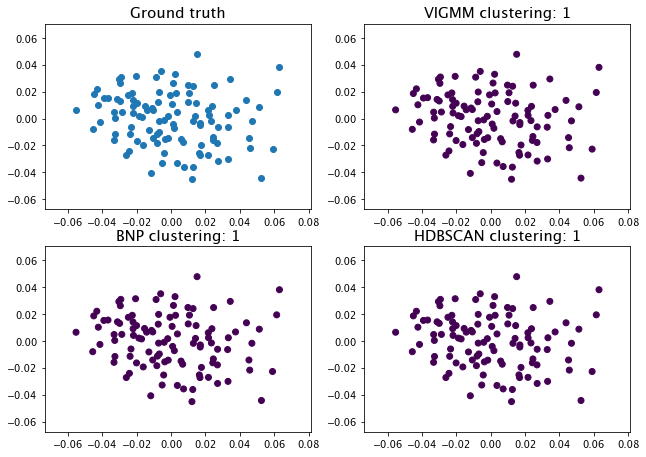

In [226]:
data = proportionMat[:,50,:]
test_clusters(data,alpha=1e10)

In [93]:
#data = conn[:,50,:]
#test_clusters(data)

ndim=7


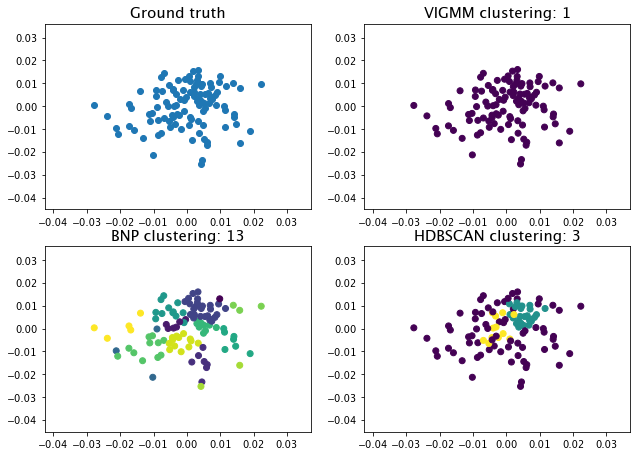

In [222]:
data = P_tiny
test_clusters(data,alpha=1e-100)

ndim=21


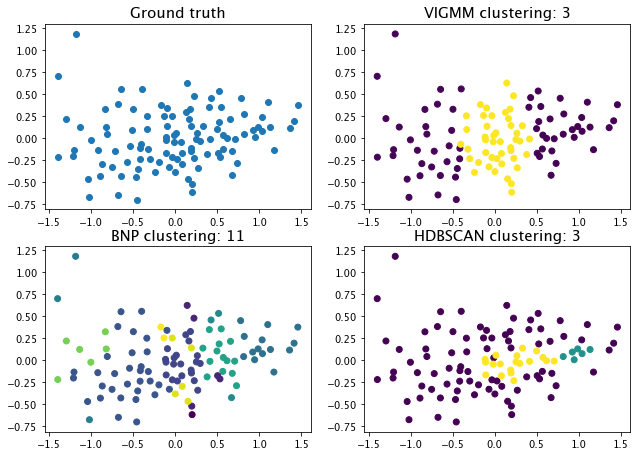

In [230]:
test_clusters(flatten_C(get_tiny_C(cmats[:,50,:,:])))

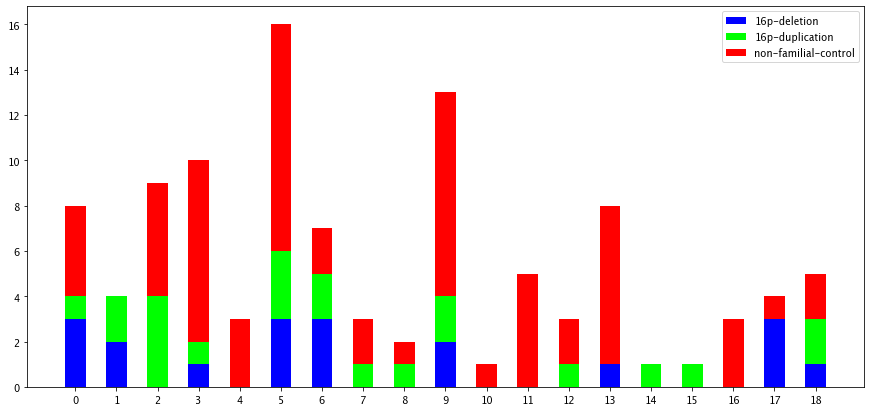

In [91]:
cids = np.unique(z)
nclust = len(cids)
arr = np.array(df['family_type'])
#arr = np.array(df['sex'])
uvals = np.unique(arr)
mat = np.zeros((nclust,len(uvals)))
for c in range(nclust):
    cid = cids[c]
    mat[c,:] = np.array([np.array(arr[z==cid]==uval).sum() for uval in uvals]) 
mat

plt.figure(figsize=(15,7))
for i in range(nclust):
    x = i
    y = mat[x,:]
    plt.stackplot((x,x+.5),y[0],y[1],y[2],colors=((0,0,1),(0,1,0),(1,0,0)))
    
plt.legend(uvals);
plt.xticks(np.arange(nclust)+.25,labels=np.arange(nclust));

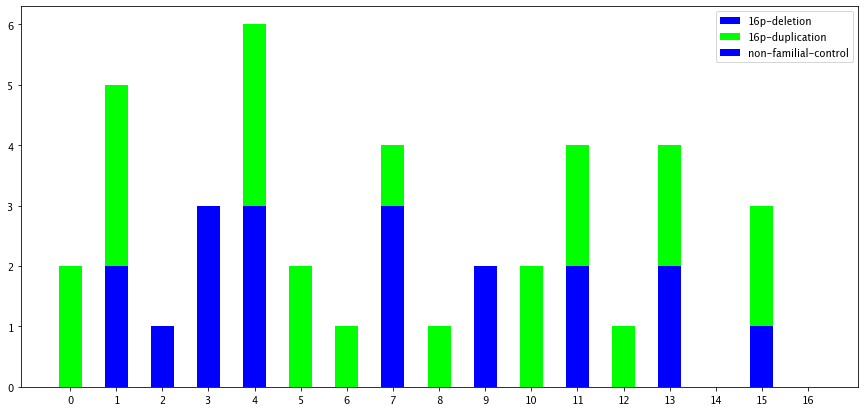

In [55]:
cids = np.unique(z)
nclust = len(cids)

#arr = np.array(df['initial_clinical_asd_dx'])
#arr = np.array(df['sex'])
uvals = np.unique(arr)
mat = np.zeros((nclust,len(uvals)))
for c in range(nclust):
    cid = cids[c]
    mat[c,:] = np.array([np.array(arr[z==cid]==uval).sum() for uval in uvals]) 
mat

plt.figure(figsize=(15,7))
for i in range(nclust):
    x = i
    y = mat[x,:]
    #plt.stackplot((x,x+.5),y[0],y[1],y[2],colors=((0,0,1),(0,1,0),(1,0,0)))
    plt.stackplot((x,x+.5),y[0],y[1],colors=((0,0,1),(0,1,0),(1,0,0)))
    
plt.legend(uvals);
plt.xticks(np.arange(nclust)+.25,labels=np.arange(nclust));

In [56]:
def get_zval_mat(z,arr):
    cids = np.unique(z)
    nclust = len(cids)
    #arr = np.array(df['family_type'])
    #arr = np.array(df['sex'])
    uvals = np.unique(arr)
    mat = np.zeros((nclust,len(uvals)))
    for c in range(nclust):
        cid = cids[c]
        mat[c,:] = np.array([np.array(arr[z==cid]==uval).sum() for uval in uvals]) 
    return mat
    
def plot_clustStacked(mat,arr):
    plt.figure(figsize=(15,7))
    for i in range(nclust):
        x = i
        y = mat[x,:]
        
        
        if mat.shape[1]==2:
            plt.stackplot((x,x+.5),y[0],y[1],colors=((0,0,1),(0,1,0),(1,0,0)))
        elif mat.shape[1]==3: 
            plt.stackplot((x,x+.5),y[0],y[1],y[2],colors=((0,0,1),(0,1,0),(1,0,0)))
                    
    uvals = np.unique(arr)            
    plt.legend(uvals);1
    plt.xticks(np.arange(nclust)+.25,labels=np.arange(nclust));

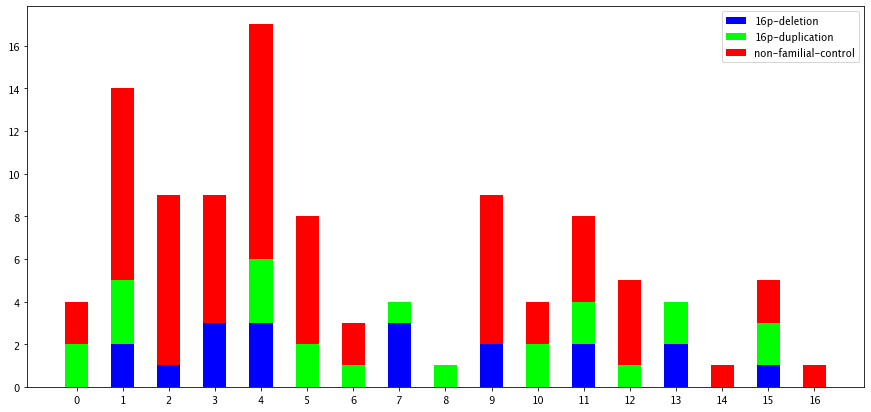

In [57]:
arr = np.array(df['family_type']);arr
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)

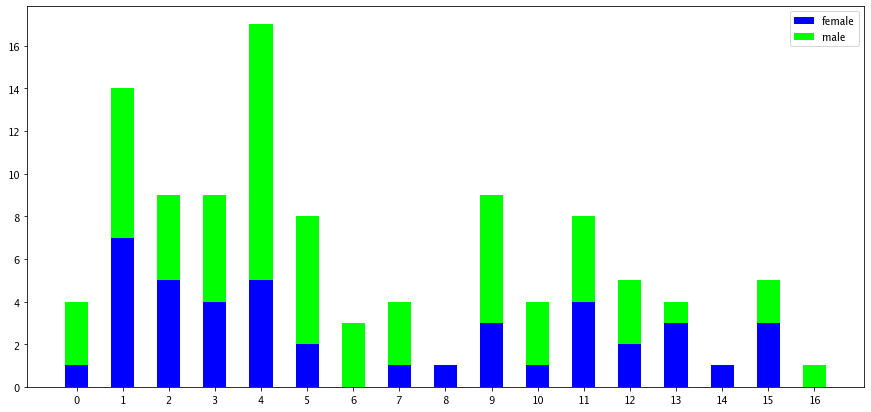

In [58]:
arr = np.array(df['sex']);arr
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)

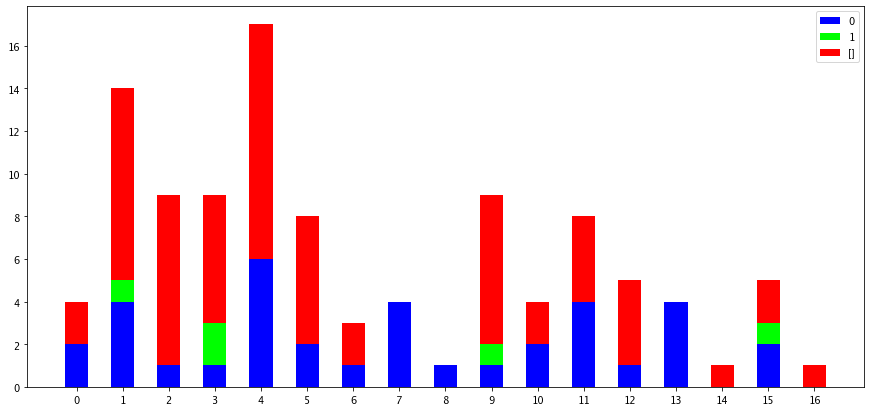

In [59]:
arr = np.array(df['clinical_asd_dx']);arr
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)

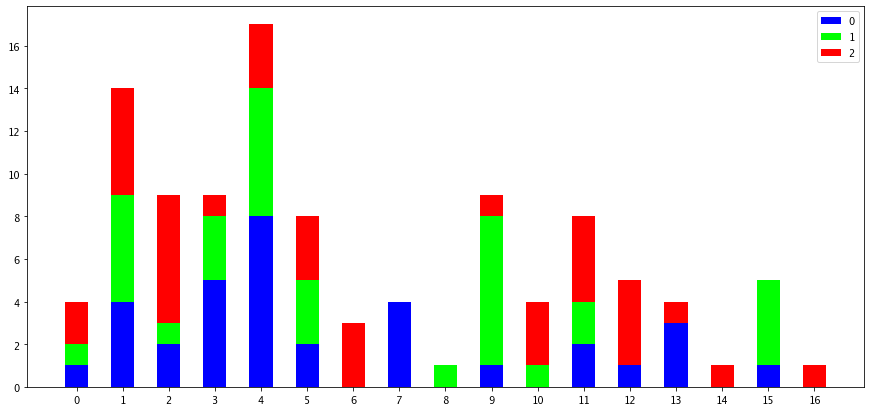

In [60]:
arr = np.digitize(np.array(df['age_years']),[15,34])
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)

ndim=2


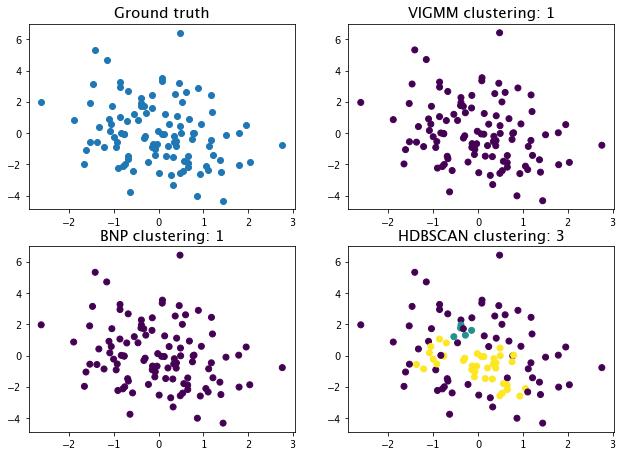

In [138]:
arr = [float(n) for n in np.array(df['htwhc.head_circum_final']) if n!='[]']
data = arr
data = np.vstack((data,data))
#data = np.vstack((np.random.normal(10,1,106),np.random.normal(20,2,106))).transpose()
test_clusters(data)

In [199]:
from sklearn import mixture
bmodel = mixture.BayesianGaussianMixture(max_iter=100000,
                                      n_components=20,covariance_type=['full','tied','diag' ,'spherical'][3],
                                      init_params='kmeans',tol=1e-5,
                                      weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=1e2,mean_precision_prior=None)



arr = [float(n) for n in np.array(df['htwhc.head_circum_final']) if n!='[]']
data = np.array(arr)
data = data.reshape(-1, 1)
bmodel.fit(data)
z = bmodel.predict(data)

In [201]:
data

array([[54. ],
       [55.2],
       [55.5],
       [52.5],
       [49. ],
       [49.7],
       [52.5],
       [53.5],
       [54. ],
       [53. ],
       [55.8],
       [56. ],
       [51.5],
       [57.5],
       [54.2],
       [50. ],
       [53. ],
       [56.5],
       [57. ],
       [58. ],
       [57. ],
       [56.1],
       [55. ],
       [53.4],
       [54.9],
       [51.4],
       [51. ],
       [54.5],
       [58. ],
       [58. ],
       [54. ],
       [59.7],
       [56. ],
       [57. ],
       [57. ],
       [58. ],
       [57.5],
       [57.5],
       [55.5]])

1e-05